In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
# Create a file directory
file_dir = '/Users/rfnichol/OneDrive - COOPER TIRE & RUBBER COMPANY/Personal/Data Analytics Boot Camp/Module_8_ETL/Module_8_files/Movies_ETL'
# file_dir = '/Users/rfnichol/Movies_ETL'

In [3]:
# Open the json file
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
# How many records were pulled in? Use the len function
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
# Since the Kaggle data is already in flat-file formats, we'll just pull them into Pandas DataFrames directly 
# with the following code
kaggle_metadata_df = pd.read_csv(f'{file_dir}/archive/movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv(f'{file_dir}/archive/ratings.csv')

In [9]:
# View the dataframe using the head method for any correctins or issues
kaggle_metadata_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
# View the dataframe using the head method for any correctins or issues
ratings_df.head(5)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [11]:
# errors can still occur in the middle of the file, so the best practice is to sample a handful of rows randomly using the 
# sample() method. For a DataFrame called df, df.sample(n=5) will show five random rows from the dataset. 
kaggle_metadata_df.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
42771,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}]",http://sic.conaculta.gob.mx/ficha.php?table=pr...,400001,tt4145318,es,Trémulo,Carlos sweeps and mops the floor of an old-tim...,...,2015-03-08,0.0,20.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Trémulo,False,7.2,5.0
40983,False,NaN,1446950,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,279966,tt2145909,en,The Forgotten,When a father and son are forced to squat in a...,...,2014-08-22,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Forgotten,False,6.2,6.0
17151,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",NaN,38931,tt1326954,en,Oh My God,"""Oh My God"" asks people from all walks of life...",...,2009-11-13,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Did God create Man or did Man create God?,Oh My God,False,4.6,4.0
17155,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,43692,tt0024989,en,The Clairvoyant,A fake psychic suddenly turns into the real th...,...,1934-01-01,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HEXED BY THE EVIL EYE,The Clairvoyant,False,6.5,1.0
9172,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,13777,tt0172543,en,He Died with a Felafel in His Hand,"A search for love, meaning and bathroom solitu...",...,2001-08-30,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,He Died with a Felafel in His Hand,False,6.9,17.0


In [12]:
# errors can still occur in the middle of the file, so the best practice is to sample a handful of rows randomly using the 
# sample() method. For a DataFrame called df, df.sample(n=5) will show five random rows from the dataset. 
ratings_df.sample(n=5)

,userId,movieId,rating,timestamp
12271475,127346,59369,3.5,1265580355
13356610,138857,93838,5.0,1489463296
16222645,168608,56156,1.5,1361913337
4833251,49749,1197,3.0,1179719028
6518260,67257,5530,4.0,1184485971


In [13]:
# see all of the column names that were imported.
kaggle_metadata_df.columns.tolist() 

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [14]:
# codify our JSON data by restricting it to only those entries that have a director and an IMDb link. We can do this 
# with a list comprehension.
kaggle_movies = [movie for movie in kaggle_metadata_df
                   if 'original_title' in movie]
 #                  and 'imdb_id' in movie]
len(kaggle_movies)

1

In [15]:
# Create a dataframe for the wiki_movies_raw file
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [16]:
# view the wifi_movies_df
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# view the wifi_movies_df using the sample function
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
889,https://en.wikipedia.org/wiki/What%27s_Eating_...,1993.0,https://www.imdb.com/title/tt0108550/,What's Eating Gilbert Grape,Lasse Hallström,"[Bertil Ohlsson, David Matalon, Meir Teper]",Peter Hedges,NaN,"[What's Eating Gilbert Grape, by Peter Hedges]","[Johnny Depp, Juliette Lewis, Mary Steenburgen...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3401,https://en.wikipedia.org/wiki/Chasing_Papi,2003.0,https://www.imdb.com/title/tt0323572/,Chasing Papi,Linda Mendoza,"[Laura Angelica Simon, Tracey Trench, Forest W...",NaN,NaN,NaN,"[Roselyn Sánchez, Sofía Vergara, Jaci Velasque...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990.0,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,https://en.wikipedia.org/wiki/Mixed_Nuts,1994.0,https://www.imdb.com/title/tt0110538/,Mixed Nuts,Nora Ephron,"[Joseph Hartwick, Paul Junger Witt, Tony Thomas]",NaN,NaN,NaN,"[Steve Martin, Madeline Kahn, Robert Klein, An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,https://en.wikipedia.org/wiki/Dumb_and_Dumbere...,2003.0,https://www.imdb.com/title/tt0329028/,Dumb and Dumberer:When Harry Met Lloyd,Troy Miller,"[Troy Miller, Brad Krevoy, Mark Burg, Oren Kou...","[Troy Miller, Robert Brener]",Robert Brener,"[Characters, by, Peter Farrelly, Bobby Farrell...","[Derek Richardson, Eric Christian Olsen, Rache...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4227,https://en.wikipedia.org/wiki/Grandma%27s_Boy_...,2006.0,https://www.imdb.com/title/tt0456554/,Grandma's Boy,Nicholaus Goossen,"[Allen Covert, Adam Sandler, Nick Swardson]",NaN,NaN,NaN,"[Linda Cardellini, Allen Covert, Nick Swardson...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4257,https://en.wikipedia.org/wiki/Idiocracy,2006.0,https://www.imdb.com/title/tt0387808/,Idiocracy,Mike Judge,"[Mike Judge, Elysa Koplovitz, Michael Nelson]",NaN,NaN,NaN,"[Luke Wilson, Maya Rudolph, Dax Shepard]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,https://en.wikipedia.org/wiki/Lulu_on_the_Bridge,1998.0,https://www.imdb.com/title/tt0125879/,Lulu on the Bridge,Paul Auster,"[Greg Johnson, Amy J. Kaufman, Peter Newman]",Paul Auster,NaN,NaN,"[Harvey Keitel, Mira Sorvino, Willem Dafoe, Gi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5033,https://en.wikipedia.org/wiki/Cirque_du_Freak:...,2009.0,https://www.imdb.com/title/tt0450405/,Cirque du Freak: The Vampire's Assistant,Paul Weitz,"[Lauren Shuler Donner, Paul Weitz, Ewan Leslie...","[Paul Weitz, Brian Helgeland]",NaN,"[Vampire Blood, by, Darren Shan]","[John C. Reilly, Ken Watanabe, Josh Hutcherson...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,https://en.wikipedia.org/wiki/The_Pit_and_the_...,1990.0,https://www.imdb.com/title/tt0100369/,The Pit and the Pendulum,Stuart Gordon,"[Albert Band, Charles Band, Michael Catalano]",NaN,NaN,"[The Pit and the Pendulum, and, The Cask of Am...","[Lance Henriksen, Rona De Ricci, Jonathan Full...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# see all of the column names that were imported from wiki_movies.
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [19]:
# Create a list comprehension with the filter expression we created and save that to an intermediate variable wiki_movies.
# See how many movies are in wiki_movies with the len() function.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [20]:
# Create a function to clean up the data
# 1 Name
# 2 Parameters
# 3 Code block
# 4 Return value

# Scope 
# Inside the code block of a function, we can use variables that were created outside the function and 
# initialize new variables inside the function.
# This is called the "scope" of the variables:

#    Variables created outside the function are called global variables.
#    New variables created inside the function are local variables.
#    The hierarchy of variables is called the scope.

# For example consider the following code
x = 'global value'

def foo():
    x = 'local value'
    print(x)

foo()
print(x)


local value
global value


In [21]:
# we have to be careful with variables we send to a function. Any data structure can be sent as a parameter to 
# a function, including dicts, lists, and tuples, but we must be careful with mutable objects.
my_list = [1,2,3]
def append_four(x):
    x.append(4)
append_four(my_list)
print(my_list)

[1, 2, 3, 4]


In [22]:
# Lambda functions which is the most stripped down we can make. Lambda functions are written in one line and automatically 
# return a value. without using the return keyword. Lambda functions have no name and are also known as 
# "anonymous functions."
# Bsic syntax: lambda arguments: expression
# lambda x: x * x
square = lambda x: x * x
square(5)

25

In [23]:
# Create a function to clean up the data
# 1 Name
# 2 Parameters
# 3 Code block
# 4 Return value

# Iteration 1
# def clean_movie(movie):
#    movie_copy = dict(movie)

# Iteration 2 
# def clean_movie(movie):
#    movie = dict(movie) #create a non-destructive copy

# Iteration 3
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

In [24]:
# Inspection
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [26]:
# Go through each of the columns, one by one, and determine which columns hold alternate titles.
# Module Skill Drill wanted you to look at each column and corresponding date to find column that contains alternate title
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [27]:
# Alternate way of finding which column contains Alternate Title
wiki_movies_df.sample(n=20)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
2033,https://en.wikipedia.org/wiki/Jackie_Brown_(film),1997.0,https://www.imdb.com/title/tt0119396/,Jackie Brown,Quentin Tarantino,Lawrence Bender,Quentin Tarantino,NaN,"[Rum Punch, by, Elmore Leonard]","[Pam Grier, Samuel L. Jackson, Robert Forster,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,https://en.wikipedia.org/wiki/Cutthroat_Island,1995.0,https://www.imdb.com/title/tt0112760/,Cutthroat Island,Renny Harlin,"[Renny Harlin, Laurence Mark, Joel B. Michaels...","[Robert King, Marc Norman]","[Michael Frost Beckner, James Gorman, Bruce A....",NaN,"[Geena Davis, Matthew Modine, Frank Langella, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2669,https://en.wikipedia.org/wiki/True_Crime_(1999...,1999.0,https://www.imdb.com/title/tt0139668/,True Crime,Clint Eastwood,"[Clint Eastwood, Richard D. Zanuck, Lili Fini ...","[Larry Gross, Paul Brickman, Stephen Schiff]",NaN,"[True Crime, by, Andrew Klavan]","[Clint Eastwood, Isaiah Washington, Denis Lear...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3313,https://en.wikipedia.org/wiki/Solaris_(2002_film),2002.0,https://www.imdb.com/title/tt0307479/,Solaris,Steven Soderbergh,"[James Cameron, Jon Landau, Rae Sanchini]",Steven Soderbergh,NaN,"[Solaris, by, Stanisław Lem]","[George Clooney, Natascha McElhone]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4871,https://en.wikipedia.org/wiki/Indiana_Jones_an...,2008.0,https://www.imdb.com/title/tt0367882/,Indiana Jones and theKingdom of the Crystal Skull,Steven Spielberg,Frank Marshall,David Koepp,"[George Lucas, Jeff Nathanson]","[Characters, by George Lucas, Philip Kaufman]","[Harrison Ford, Cate Blanchett, Karen Allen, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,https://en.wikipedia.org/wiki/The_Monster_(199...,1994.0,https://www.imdb.com/title/tt0110570/,Il mostro,Roberto Benigni,Roberto Benigni,NaN,NaN,NaN,"[Roberto Benigni, Nicoletta Braschi, Michel Bl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,https://en.wikipedia.org/wiki/The_MatchMaker_(...,1997.0,https://www.imdb.com/title/tt0119632/,The Matchmaker,Mark Joffe,"[Tim Bevan, Eric Fellner, Luc Roeg]","[Karen Janszen, Louis Nowra, Graham Linehan]",NaN,"[Original screenplay by, Greg Dinner]","[Janeane Garofalo, David O'Hara, Milo O'Shea, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2466,https://en.wikipedia.org/wiki/Zero_Effect,1998.0,https://www.imdb.com/title/tt0120906/,Zero Effect,Jake Kasdan,"[Lisa Henson, Jake Kasdan, Janet Yang]",NaN,NaN,NaN,"[Bill Pullman, Ben Stiller, Kim Dickens, Angel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5551,https://en.wikipedia.org/wiki/Mission:_Impossi...,2011.0,https://www.imdb.com/title/tt1229238/,Mission: Impossible – Ghost Protocol,Brad Bird,"[Tom Cruise, J. J. Abrams, Bryan Burk]",NaN,NaN,"[Mission: Impossible, by, Bruce Geller]","[Tom Cruise, Jeremy Renner, Simon Pegg, Paula ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2224,https://en.wikipedia.org/wiki/Zeus_and_Roxanne,1997.0,https://www.imdb.com/title/tt0120550/,Zeus and Roxanne,George T. Miller,"[Laura Friedman, Hilton A. Green]",NaN,NaN,NaN,"[Steve Guttenberg, Kathleen Quinlan, Miko Hughes]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Create a function to handle the alternative titles
# 1 Make an empty dict to hold all of the alternative titles. 
# 2 Loop through a list of all alternative title keys:
# 2a   Check if the current key exists in the movie object.
# 2b   If so, remove the key-value pair and add to the alternative titles dict.
# 3 After looping through every key, add the alternative titles dict to the movie object.

# 1 Make an empty dict to hold all of the alternative titles.   
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie












In [29]:
# 2 Loop through a list of all alternative title keys:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        return movie        

In [30]:
# 2a   Check if the current key exists in the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

In [31]:
# 2b   If so, remove the key-value pair and add to the alternative titles dict.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)

    return movie

In [32]:
# 3 After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [33]:
# make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [34]:
# Extract the IMDb ID from the IMDb link. Use regular expression (regex).
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [35]:
# Skill drill. Howe many null values are in each column?
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [36]:
# Skill drill. How many null values are in each column? Alternative method
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [37]:
# How can you make a list of columns with less than 90% null values. 
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [38]:
# To ensure we hae the correct data types, review the data types in the dataframe
wiki_movies_df.dtypes

url                       object
year                       int64
imdb_link                 object
title                     object
Based on                  object
Starring                  object
Narrated by               object
Cinematography            object
Release date              object
Running time              object
Country                   object
Language                  object
Budget                    object
Box office                object
Director                  object
Distributor               object
Editor(s)                 object
Composer(s)               object
Producer(s)               object
Production company(s)     object
Writer(s)                 object
Genre                     object
Original language(s)      object
Original network          object
Executive producer(s)     object
Production location(s)    object
Picture format            object
Audio format              object
Voices of                 object
Followed by               object
Created by

In [39]:
# start on the box office data, make a data series that drops missing values with the following
box_office = wiki_movies_df['Box office'].dropna()

In [40]:
# Rerun to see impact of dropna(). How many null values are in each column? Alternative method
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [41]:
# Using the map() method, we can see which values are not strings in the box_office data series
# 1 First, make a is_not_a_string() function:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(is_not_a_string)]


34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [42]:
# Alternative method is using a lambda function
# they use the following expression: lambda arguments: expression
# so he lambda function version of is_not_a_string() is:
# lambda x: type(x) != str
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [43]:
# Next use a simple space as our joining character and apply the join() function only when our data points 
# are lists. The code looks like the following:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [44]:
# The box office data is written in two forms: "$123.4 million" (or billion), and "$123,456,789."
# Build a regular expression for each form, and then see what forms are left over.
# create the first form
# For the first form, our pattern match string will include six elements in the following order:
# 1 A dollar sign
# 2 An arbitrary (but non-zero) number of digits
# 3 An optional decimal point
# 4 An arbitrary (but possibly zero) number of more digits
# 5A space (maybe more than one)
# 6 The word "million" or "billion"
# Create a variable and  set it equal to the finished regular expression string. 

# 1 A dollar sign
# \$

# 2 An arbitrary (but non-zero) number of digits
# We'll add the \d character to specify digits only, and the + modifier to capture one or more digits. 
# Our regular expression string now appears as "\$\d+".

# 3 An optional decimal point
# Remember, the decimal point is a special character, so it needs to be escaped with a backslash. 
# Since the decimal point is optional, add a question mark modifier after it. Our regular expression 
# string now appears as "\$\d+\.?"

# 4 An arbitrary (but possibly zero) number of more digits
# we'll use the \d character to specify digits only, but now with the * modifier because there may be no 
# more digits after the decimal point. Our regular expression string now appears as "\$\d+\.?\d*"

# 5A space (maybe more than one)
# Now we're going to use the \s character to match whitespace characters. To be safe, we'll match any number 
# of whitespace characters with the * modifier. Our regular expression string now appears as "\$\d+\.?\d*\s*"

# 6 The word "million" or "billion"
# Since "million" and "billion" only differ by one letter, we can match it with a character set for the first 
# letter. We specify character sets with square brackets, so we'll add "[mb]illion" to the end of our string. 
# Our finished regular expression string now appears as "\$\d+\.?\d*\s*[mb]illion"

# Create a variable and  set it equal to the finished regular expression string. Because we need the 
# escape characters to remain, we need to preface the string with an r
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [45]:
# Now, to count up how many box office values match our first form. We'll use the str.contains() method on 
# box_office. To ignore whether letters are uppercase or lowercase, add an argument called flags, and set it 
# equal to re.IGNORECASE. In case the data is not a string, we'll add the na=False argument to parse the 
# non-string data to False. Finally, we can call the sum()method to count up the total number that return True. 
# Your code should look like the following:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [46]:
# The box office data is written in two forms: "$123.4 million" (or billion), and "$123,456,789."
# Build a regular expression for each form, and then see what forms are left over.
# create the second form

# 1 Start with a dollar sign. we need to escape the dollar sign for it to match. Our regular expression string 
# starts like this: "\$".

# 2 Add a group of one to three digits.
# We'll use the \d character for digits, but this time, we'll modify it with curly brackets to only match one 
# through three repetitions. Our regular expression string now appears as "\$\d{1,3}".

# 3 Match at least one group starting with a comma and followed by exactly three digits
# To match a comma and exactly three digits, we'll use the string ",\d{3}". To match any repetition of that group, 
# we'll put it inside parentheses, and then put a plus sign after the parentheses: "(,\d{3})+". We'll add one more 
# modification to specify that this is a non-capturing group by inserting a question mark and colon after the opening 
# parenthesis: "(?:,\d{3})+". The use of a non-capturing group isn’t strictly necessary here, but it eliminates an 
# unwanted warning message in Jupyter Notebook. Our finished regular expression string now appears as "\$\d{1,3}(?:,\d{3})+"

# 4 Create a variable and  set it equal to the finished regular expression string.
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [47]:
# see which values aren't described by either. To be safe, we should see if any box office values are described by both.
# To make our code easier to understand, we'll create two Boolean Series called matches_form_one and matches_form_two, 
# and then select the box office values that don't match either. First, create the two Boolean series with the following 
# code:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [48]:
# Try the following code to see which values in box_office don't match either form
# Recall the Python logical keywords "not," "and," and "or." 
# this will throw an error!
# Comment out the code
# box_office[(not matches_form_one) and (not matches_form_two)]
# Instead, Pandas has element-wise logical operators:

#     The element-wise negation operator is the tilde: ~ (similar to "not")
#     The element-wise logical "and" is the ampersand: &
#     The element-wise logical "or" is the pipe: |
box_office[(~matches_form_one) & (~matches_form_two)]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [49]:
# Fix Pattern Matches
# We can fix our pattern matches to capture more values by addressing these issues:

# 1 Some values have spaces in between the dollar sign and the number.
# 2 Some values use a period as a thousands separator, not a comma.
# 3 Some values are given as a range.
# 4 "Million" is sometimes misspelled as "millon."

# 1. Some values have spaces in between the dollar sign and the number.
# This is easy to fix. Just add \s* after the dollar signs. The new forms should look like the following:
# form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
# form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [50]:
# Fix Pattern Matches
# We can fix our pattern matches to capture more values by addressing these issues:
# 2 Some values use a period as a thousands separator, not a comma.
# This is slightly more complicated, but doable. Simply change form_two to allow for either a comma or period as a 
# thousands separator. We’d ordinarily do that by putting the comma and period inside straight brackets [,.], but 
# the period needs to be escaped with a slash [,\.]. The code should match the following:
# form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

# The results will also match values like 1.234 billion, but we're trying to change raw numbers like $123.456.789. 
# We don't want to capture any values like 1.234 billion, so we need to add a negative lookahead group that looks 
# ahead for "million" or "billion" after the number and rejects the match if it finds those strings. Don't forget 
# the space! The new form should look like this:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [51]:
# Fix Pattern Matches
# We can fix our pattern matches to capture more values by addressing these issues:
# 3 Some values are given as a range.
# To solve this problem, we'll search for any string that starts with a dollar sign and ends with a hyphen, and then 
# replace it with just a dollar sign using the replace() method. The first argument in the replace() method is the 
# substring that will be replaced, and the second argument in the replace() method is the string to replace it with. 
# We can use regular expressions in the first argument by sending the parameter regex=True, as shown below.
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [52]:
# Fix Pattern Matches
# We can fix our pattern matches to capture more values by addressing these issues:
# 4 "Million" is sometimes misspelled as "millon."
# This is easy enough to fix; we can just make the second "i" optional in our match string with a question mark as follows:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [53]:
# Extract and Convert the Box Office Values
# Now that we've got expressions to match almost all the box office values, we'll use them to extract only the parts of 
# the strings that match. We do this with the str.extract() method. This method also takes in a regular expression string, 
# but it returns a DataFrame where every column is the data that matches a capture group. We need to make a regular 
# expression that captures data when it matches either form_one or form_two. We can do this easily with an f-string.

# The f-string f'{form_one}|{form_two}' will create a regular expression that matches either form_one or form_two, 
#so we just need to put the whole thing in parentheses to create a capture group. Our final string will be 
# f'({form_one}|{form_two})', and the full line of code to extract the data follows:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [54]:
# Now we need a function to turn the extracted values into a numeric value. We'll call it parse_dollars, and parse_dollars 
# will take in a string and return a floating-point number. We'll start by making a skeleton function with comments 
# explaining each step, and then fill in the steps with actual code

# def parse_dollars(s):
    # if s is not a string, return NaN
    # if type(s) != str:
    #   return np.nan

    # if input is of the form $###.# million
   # if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
 #   elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
  #  elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
   # else:
    #    return np.nan

In [55]:
# Parse dollars continued: Now we need a function to turn the extracted values into a numeric value. 
# 1 Since we're working directly with strings, we'll use the re module to access the regular expression functions. We'll 
# use re.match(pattern, string) to see if our string matches a pattern. To start, we'll make some small alterations to 
# the forms we defined, splitting the million and billion matches from form one.

# 2 Next, we'll use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters, 
# if necessary.

# 3 Convert all the strings to floats, multiply by the right amount, and return the value.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [56]:
# Now we have everything we need to parse the box office values to numeric values.
# First, we need to extract the values from box_office using str.extract. Then we'll apply parse_dollars to the first 
# column in the DataFrame returned by str.extract, which in code looks like the following:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [57]:
# This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that 
# matches a capture group
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [58]:
# did not get same output as module. Goofed up a step. Ask at office hours tonight!
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id,box_office
4815,https://en.wikipedia.org/wiki/Amelia_(film),2009,https://www.imdb.com/title/tt1129445/,Amelia,"[East to the Dawn, by, Susan Butler, and, The ...","[Hilary Swank, Richard Gere, Ewan McGregor, Ch...",NaN,Stuart Dryburgh,"[October 23, 2009, (, 2009-10-23, )]",111 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1129445,19600000.0
1258,https://en.wikipedia.org/wiki/Harrison_Bergero...,1995,https://www.imdb.com/title/tt0113264/,Harrison Bergeron,Harrison Bergeron,"[Sean Astin, Christopher Plummer, Eugene Levy,...",NaN,Michael Storey,"[August 13, 1995, (, 1995-08-13, )]",99 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0113264,NaN
1787,https://en.wikipedia.org/wiki/Addicted_to_Love...,1997,https://www.imdb.com/title/tt0118556/,Addicted to Love,NaN,"[Meg Ryan, Matthew Broderick, Kelly Preston, T...",NaN,Andrew Dunn,"May 23, 1997",100 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0118556,34670000.0
5511,https://en.wikipedia.org/wiki/Caroline_and_Jackie,2012,https://www.imdb.com/title/tt1711016/,Caroline and Jackie,NaN,"[Marguerite Moreau, Bitsie Tulloch, David Giun...",NaN,Christian Swegal,"[April 21, 2012, (, 2012-04-21, ), (Tribeca Fi...",85 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1711016,NaN
4396,https://en.wikipedia.org/wiki/For_the_Bible_Te...,2007,https://www.imdb.com/title/tt0912583/,For the Bible Tells Me So,NaN,NaN,NaN,NaN,"[October 5, 2007, (, 2007-10-05, )]",98 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0912583,312751.0


In [59]:
# Run wiki_movies_df[‘box_office’]
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018,6939946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",NaN,Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1255919,41900000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",NaN,Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt6266538,76100000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",NaN,Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt4669788,38400000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",NaN,Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",123 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7137380,5500000.0


In [60]:
# Parse budget data
# ese the same pattern matches used in the box office parse and see how many budget values are in a different form.
# First, we need to preprocess the budget data, just like we did for the box office data.
# Create a budget variable with the following code:
budget = wiki_movies_df['Budget'].dropna()

In [61]:
# Convert any lists to strings:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [62]:
# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [63]:
# Use the same pattern matches that you created to parse the box office data, and apply them without modifications 
# to the budget data. Then, look at what's left.
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [64]:
# Another issue is discovered: citation references (the numbers in square brackets).
# We can remove those fairly easily with a regular expression.
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\rfnichol\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [65]:
# Drop the original Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [66]:
# Parse Release Date
# Parsing the release date will follow a similar pattern to parsing box office and budget, but with different forms.

# First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [67]:
# The forms we'll be parsing are:

# 1 Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# 2 Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# 3 Full month name, four-digit year (i.e., January 2000)
# 4 Four-digit year
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [68]:
# And then we can extract the dates with:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [69]:
# Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas. Since 
# there are different date formats, set the infer_datetime_format option to True. The date formats we've targeted are 
# among those that the to_datetime() function can recognize, which explains the infer_datetime_format=True argument below.
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [70]:
# Parse Running Time
# First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [71]:
# It looks like most of the entries just look like "100 minutes." Let's see how many running times look exactly like 
# that by using string boundaries.
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [72]:
# The above code returns 6,528 entries. Let's get a sense of what the other 366 entries look like.
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [73]:
# Let's make this more general by only marking the beginning of the string, and accepting other abbreviations of 
# "minutes" by only searching up to the letter "m.
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [74]:
# That accounts for 6,877 entries. The remaining 17 follow:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [75]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

# 1 Start with one or more digits.
# 2 Have an optional space after the digit and before the letter "h."
# 3 Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except 
#   the "h."
# 4 Have an optional space after the "hours" marker.
# 5 Have an optional number of digits for minutes.
# As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

# We only want to extract digits, and we want to allow for both possible patterns. Therefore, we'll add capture 
# groups around the \d instances as well as add an alternating character. Our code will look like the following.
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [76]:
# Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. Because we may have 
# captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the 
# errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [77]:
# Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the 
# pure minutes capture group is zero, and save the output to wiki_movies_df:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [78]:
# Finally, we can drop Running time from the dataset with the following code:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [79]:
# Clean the Kaggle Data
# first things we want to check is that all of the columns came in as the correct data types
kaggle_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [80]:
# We'll just go down the list and convert the data types for each of the six columns that need to be converted.
# Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.
kaggle_metadata_df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [81]:
# Clearly, we have some bad data in here. Let's remove it.
kaggle_metadata_df[~kaggle_metadata_df['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# The biggest concern is that none of the data in these rows above looks like an imdb_id. Since that's missing, there's 
# no amount of rearranging that will make these rows into good data. We're just going to have to drop them.
# we'll only keep rows where adult is False, and then drop the "adult" column.
# The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata_df = kaggle_metadata_df[kaggle_metadata_df['adult'] == 'False'].drop('adult',axis='columns')

In [83]:
# Check to see that no adult movies are in dataframe
# kaggle_metadata_df[~kaggle_metadata_df['adult'].isin(['False'])] # did not run since adult column was removed
# Check dataframe
kaggle_metadata_df

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [84]:
# Next, we'll look at the values of the video column:
kaggle_metadata_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [85]:
# Great, there are only False and True values. We can convert video fairly easily.
# Convert data types
# To convert, use the following code:
# kaggle_metadata_df['video'] == 'True'
# The above code creates the Boolean column we want. We just need to assign it back to video
kaggle_metadata_df['video'] = kaggle_metadata_df['video'] == 'True'

In [86]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. We'll make sure the errors= argument 
# is set to 'raise', so we'll know if there's any data that can't be converted to numbers.
kaggle_metadata_df['budget'] = kaggle_metadata_df['budget'].astype(int)
kaggle_metadata_df['id'] = pd.to_numeric(kaggle_metadata_df['id'], errors='raise')
kaggle_metadata_df['popularity'] = pd.to_numeric(kaggle_metadata_df['popularity'], errors='raise')

In [87]:
# Finally, we need to convert release_date to datetime. Luckily, Pandas has a built-in function for that as well: 
# to_datetime(). 
# Since release_date is in a standard format, to_datetime() will convert it without any fuss.
kaggle_metadata_df['release_date'] = pd.to_datetime(kaggle_metadata_df['release_date'])

In [88]:
kaggle_metadata_df.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [89]:
# Reasonability Checks on Ratings Data
# Lastly, we'll take a look at the ratings data. We'll use the info() method on the DataFrame. Since the ratings dataset 
#has so many rows, we need to set the null_counts option to True.
ratings_df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\rfnichol\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  after removing the cwd from sys.path.


In [90]:
# For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own 
# table in SQL, so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp is 
# the number of seconds since midnight of January 1, 1970.

# Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store
#time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two 
# time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, 
#specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch.
#There are other epochs in use, but the Unix epoch is by far the most widespread.
# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.
pd.to_datetime(ratings_df['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [91]:
# These dates don't seem outlandish—the years are within expected bounds, and there appears to be some consistency from 
# one entry to the next. Since the output looks reasonable, assign it to the timestamp column.
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

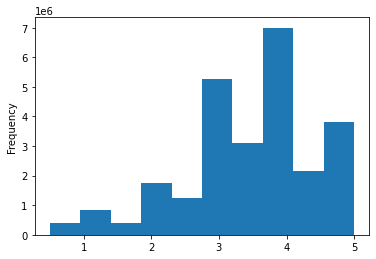

In [92]:
# Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way
# to do this is to look at a histogram of the rating distributions, and then use the describe() method to print out some 
# stats on central tendency and spread.
pd.options.display.float_format = '{:20,.2f}'.format
ratings_df['rating'].plot(kind='hist')
ratings_df['rating'].describe()

In [93]:
# That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in 
# the histogram. The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.

In [94]:
# Merge Wikipedia and Kaggle Metadata
# Now that the Wikipedia data and Kaggle data are cleaned up and in tabular formats with the right data types for each 
# column, Britta can join them together. However, after they're joined, the data still needs to be cleaned up a bit, 
# especially where Kaggle and Wikipedia data overlap.

# With all the tables cleaned up, we're ready to merge them by IMDb ID.
# One of the things we always want to look out for after we've merged data is redundant columns.

# Print out a list of the columns so we can identify which ones are redundant. We'll use the suffixes parameter to make 
# it easier to identify which table each column came from. Here's what your code should look like: 
movies_df = pd.merge(wiki_movies_df, kaggle_metadata_df, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [95]:
movies_df.sample(n=5)

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1254,https://en.wikipedia.org/wiki/Big_Bully_(film),1996,https://www.imdb.com/title/tt0115676/,Big Bully,NaN,"[Rick Moranis, Tom Arnold, Julianne Phillips, ...",NaN,Daryn Okada,"[January 26, 1996, (, 1996-01-26, )]",United States,...,1996-01-26,"2,042,530.00",90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A comedy for the kid in all of us.,Big Bully,False,3.90,16.00
1994,https://en.wikipedia.org/wiki/The_Truman_Show,1998,https://www.imdb.com/title/tt0120382/,The Truman Show,NaN,"[Jim Carrey, Laura Linney, Noah Emmerich, Nata...",NaN,Peter Biziou,"[June 1, 1998, (, 1998-06-01, ), (Los Angeles)...",United States,...,1998-06-04,"264,118,201.00",103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,On the air. Unaware.,The Truman Show,False,7.80,"4,702.00"
3464,https://en.wikipedia.org/wiki/Akeelah_and_the_Bee,2006,https://www.imdb.com/title/tt0437800/,Akeelah and the Bee,NaN,"[Laurence Fishburne, Angela Bassett, Keke Palmer]",NaN,David Mullen,"[March 16, 2006, (, 2006-03-16, ), (, CIFF, ),...",United States,...,2006-04-28,"18,948,425.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Changing the world... one word at a time.,Akeelah and the Bee,False,6.70,85.00
5512,https://en.wikipedia.org/wiki/Hellion_(film),2014,https://www.imdb.com/title/tt3186318/,Hellion,NaN,"[Aaron Paul, Juliette Lewis, Josh Wiggins, Dek...",NaN,Brett Pawlak,"[January 17, 2014, (, 2014-01-17, ), (, Sundan...",United States,...,2014-06-13,0.00,98.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hellion,False,5.50,51.00
2286,https://en.wikipedia.org/wiki/I_Dreamed_of_Africa,2000,https://www.imdb.com/title/tt0167203/,I Dreamed of Africa,"[I Dreamed of Africa, 1991 novel, by, Kuki Gal...","[Kim Basinger, Vincent Perez, Eva Marie Saint,...",NaN,Bernard Lutic,"[May 5, 2000, (, 2000-05-05, )]",United States,...,2000-05-05,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes the adventure of a lifetime becomes ...,I Dreamed of Africa,False,5.30,18.00


In [96]:
# There are seven pairs of columns that have redundant information. We'll look at each pair of columns and decide how to 
# handle the data. There are a few options when dealing with redundant data. We'll consider two. The simplest is to just 
# drop one of the competing columns, but sometimes that means a loss of good information. Sometimes, one column will have 
# data where the other has missing data, and vice versa. In that case, we'd want the other option: fill in the gaps using 
# both columns.

#Below is the list of competing columns. 
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle            Drop Wikipedia
# running_time             runtime                 Keep Kaggle; fill in zeros with Wikipedia data
# budget_wiki              budget_kaggle           Keep Kaggle; fill in zeros with Wikipedia data 
# box_office               revenue                 Keep the Kaggle data, but fill in the zeros with Wikipedia data
# release_date_wiki        release_date_kaggle     
# Language                 original_language
# Production company(s)    production_companies

In [97]:
# Title
# First, just take a quick look at some of the titles.
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [98]:
# They both seem pretty consistent, which we'd expect. Look at the rows where the titles don't match.
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [99]:
# Both options look pretty good, but the Kaggle data looks just a little bit more consistent. Let's confirm there aren't any missing titles in the Kaggle data with the 
# following code:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [100]:
# No results were returned, so we can just drop the Wikipedia titles. Note that for now, we’re merely noting the resolution.

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

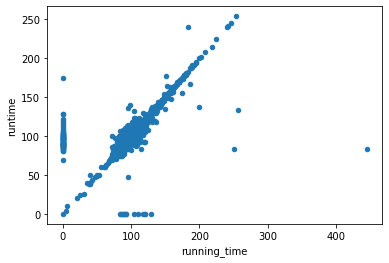

In [101]:
# Runtime
# Next, look at running_time versus runtime. A scatter plot is a great way to give us a sense of how similar the columns are 
# to each other. If the two columns were exactly the same, we'd see a scatter plot of a perfectly straight line. Any wildly 
# different values will show up as dots far from that central line, and if one column is missing data, those values will 
# fall on the x-axis or y-axis.

# Because we're dealing with merged data, we should expect there to be missing values. Scatter plots won't show null values,
# so we need to fill them in with zeros when we're making our plots to get the whole picture.
# The following code will fill in missing values with zero and make the scatter plot:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')


In [102]:
# Notice that there are more data points on the origin of the Y axis than on the origin of the X axis. Since the X axis 
#is Wikipedia and the Y axis is Kaggle, this means there are more missing entries in the Wikipedia data set than in the 
#Kaggle data set. Also, most of the runtimes are pretty close to each other but the Wikipedia data has some outliers, so 
#the Kaggle data is probably a better choice here. However, we can also see from the scatter plot that there are movies 
# where Kaggle has 0 for the runtime but Wikipedia has data, so we'll fill in the gaps with Wikipedia data.

In [109]:
# Budget
# First, just take a quick look at some of the budgets.
movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title_wiki',
 'Based on',
 'Starring',
 'Narrated by',
 'Cinematography',
 'Release date',
 'Country',
 'Language',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'Genre',
 'Original language(s)',
 'Original network',
 'Executive producer(s)',
 'Production location(s)',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Created by',
 'Preceded by',
 'Suggested by',
 'alt_titles',
 'Recorded',
 'Venue',
 'Label',
 'Animation by',
 'Color process',
 'McCune–Reischauer',
 'imdb_id',
 'box_office',
 'release_date_wiki',
 'running_time',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vot

<AxesSubplot:xlabel='budget', ylabel='revenue'>

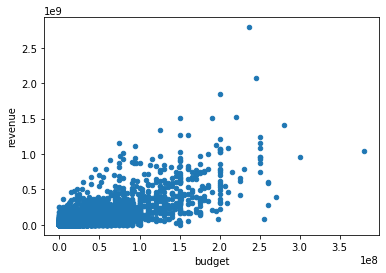

In [110]:
# Budget
# Since budget_wiki and budget_kaggle are numeric, we'll make another scatter plot to compare the values:
movies_df.fillna(0).plot(x='budget',y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

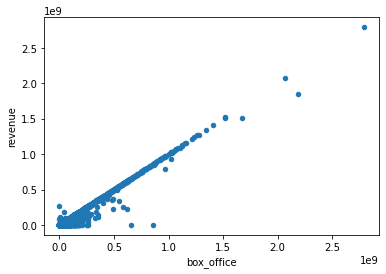

In [111]:
# Box office
# The box_office and revenue columns are numeric, so we'll make another scatter plot.
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

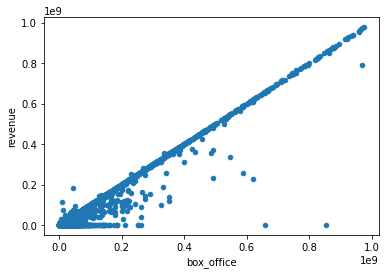

In [112]:
# That looks pretty close, but we might be getting thrown off by the scale of that large data point. Let's look at the 
# scatter plot for everything less than $1 billion in box_office.
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

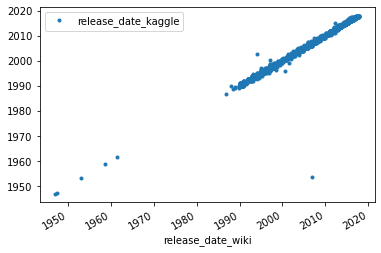

In [113]:
# Release Date
# For release_date_wiki and release_date_kaggle, we can't directly make a scatter plot, because the scatter plot only works
# on numeric data. However, there's a tricky workaround that we can use. We'll use the regular line plot (which can plot 
# date data), and change the style to only put dots by adding style='.' to the plot() method:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [114]:
# We should investigate that wild outlier around 2006. We're just going to choose some rough cutoff dates to single out 
# that one movie. We'll look for any movie whose release date according to Wikipedia is after 1996, but whose release date 
# according to Kaggle is before 1965. Here's what your code should look like:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",NaN,Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00
